In [1]:
]add LightGraphs

   Updating registry at `C:\Users\15145\.julia\registries\General`
  Resolving package versions...
No Changes to `C:\Users\15145\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\15145\.julia\environments\v1.5\Manifest.toml`


In [2]:
]add SimpleWeightedGraphs

  Resolving package versions...
No Changes to `C:\Users\15145\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\15145\.julia\environments\v1.5\Manifest.toml`


In [3]:
using LightGraphs, SimpleWeightedGraphs

In [4]:
sources = [1,	2,	3,	4,	5,	6,	6,	7,	8,	9,	9,	10,	11,	4,	12,	9,	8,	10,	8,	12,	12,	10,	12,	13,	13,	10,	13,	9,	8,	13,	11,	3,	8,	5,	2,	14,	5,	7,	3,	10,	15,	4,	4,	10,	14,	16,	12,	17,	8,	17,	1,	3,	17,	9,	17,	10,	1,	14,	14,	18,	16,	18,	12,	5,	4,	9,	5,	9,	15,	3,	17,	13,	3,	9,	11,	10,	11,	9,	8,	4,	8,	3,	3,	12,	11,	15,	5,	13,	1,	4,	1,	15,	5,	10,	11,	12,	18,	19,	11,	8,	11,	1,	1,	8,	12,	4,	2,	3,	3,	13,	21,	12,	11,	13,	2,	8,	21,	9,	20,	17,	11,	14,	4,	13,	11,	21,	9,	19,	12,	19,	3,	14,	4,	14,	2,	4,	20,	13,	11,	2,	2,	15,	21,	10,	2,	18,	21,	8,	20,	10,	1,	20,	10,	7,	20,	8,	15,	14,	15,	12,	21,	4,	10,	19,	20,	12,	15,	10,	4,	6,	13,	6,	1,	18,	21,	3,	20,	9,	14,	19,	9,	6,	8,	19,	15,	8,	11,	18,	3,	17,	17,	6,	21,	13,	20,	14,	15,	9,	11,	20,	15,	13,	8,	18,	12,	18,	10,	18,	2,	20,	20,	4,	3,	19,	17,	4,	2,	21,	11,	19,	2,	16,	15,	19,	1,	13,	3,	5,	4,	19,	20,	5,	10,	6,	20,	3,	13,	19,	9,	18,	8,	6,	8,	14,	9,	7,	16,	19,	1,	21,	3,	18,	15,	20,	1,	10,	21,	15,	1,	12,	17,	16,	21,	6,	12,	6,	21,	17,	17,	5,	21,	14,	2,	13,	11,	7,	4,	18,	4,	7,	13,	7,	8,	16,	8,	7,	20,	7,	15,	7,	10,	14,	16,	6,	16,	7,	13,	18,	4,	16,	12,	14,	15,	18,	1,	9,	13,	14,	15,	6,	2,	10,	9,	14,	21,	18,	21,	16,	20,	18,	2,	9,	1,	7,	3,	6,	11,	17,	17,	7,	9,	16,	2,	12,	21,	20,	12,	16,	11,	6,	4,	5,	10,	16,	21,	19,	1,	16,	5,	19,	14,	7,	3,	7,	3,	16,	15,	17,	1,	17,	11,	5,	21,	5,	5,	18,	5,	16,	15,	5,	2,	7,	2,	19,	20,	19,	1,	6,	2,	17,	11,	16,	12,	7,	17,	18,	17,	19,	21,	7,	1,	19,	5,	14,	2,	5,	13,	16,	1,	5,	17,	14,	6,	19,	20,	6,	7,	18,	7,	19,	6,	18,	2,	6,	20,	16,	14,	6,	15,	16]

420-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  6
  7
  8
  9
  9
 10
 11
  ⋮
  7
 19
  6
 18
  2
  6
 20
 16
 14
  6
 15
 16

In [5]:
destinations = [2,	1,	4,	3,	6,	5,	7,	6,	9,	8,	10,	9,	4,	11,	9,	12,	10,	8,	12,	8,	10,	12,	13,	12,	10,	13,	9,	13,	13,	8,	3,	11,	5,	8,	14,	2,	7,	5,	10,	3,	4,	15,	10,	4,	16,	14,	17,	12,	17,	8,	3,	1,	9,	17,	10,	17,	14,	1,	18,	14,	18,	16,	5,	12,	9,	4,	9,	5,	3,	15,	13,	17,	9,	3,	10,	11,	9,	11,	4,	8,	3,	8,	12,	3,	15,	11,	13,	5,	4,	1,	15,	1,	10,	5,	12,	11,	19,	18,	8,	11,	1,	11,	8,	1,	4,	12,	3,	2,	13,	3,	12,	21,	13,	11,	8,	2,	9,	21,	17,	20,	14,	11,	13,	4,	21,	11,	19,	9,	19,	12,	14,	3,	14,	4,	4,	2,	13,	20,	2,	11,	15,	2,	10,	21,	18,	2,	8,	21,	10,	20,	20,	1,	7,	10,	8,	20,	14,	15,	12,	15,	4,	21,	19,	10,	12,	20,	10,	15,	6,	4,	6,	13,	18,	1,	3,	21,	9,	20,	19,	14,	6,	9,	19,	8,	8,	15,	18,	11,	17,	3,	6,	17,	13,	21,	14,	20,	9,	15,	20,	11,	13,	15,	18,	8,	18,	12,	18,	10,	20,	2,	4,	20,	19,	3,	4,	17,	21,	2,	19,	11,	16,	2,	19,	15,	13,	1,	5,	3,	19,	4,	5,	20,	6,	10,	3,	20,	19,	13,	18,	9,	6,	8,	14,	8,	7,	9,	19,	16,	21,	1,	18,	3,	20,	15,	10,	1,	15,	21,	12,	1,	16,	17,	6,	21,	6,	12,	17,	21,	5,	17,	14,	21,	13,	2,	7,	11,	18,	4,	7,	4,	7,	13,	16,	8,	7,	8,	7,	20,	7,	15,	14,	10,	6,	16,	7,	16,	18,	13,	16,	4,	14,	12,	18,	15,	9,	1,	14,	13,	6,	15,	10,	2,	14,	9,	18,	21,	16,	21,	18,	20,	9,	2,	7,	1,	6,	3,	17,	11,	7,	17,	16,	9,	12,	2,	20,	21,	16,	12,	6,	11,	5,	4,	16,	10,	19,	21,	16,	1,	19,	5,	7,	14,	7,	3,	16,	3,	17,	15,	17,	1,	5,	11,	5,	21,	18,	5,	16,	5,	5,	15,	7,	2,	19,	2,	19,	20,	6,	1,	17,	2,	16,	11,	7,	12,	18,	17,	19,	17,	7,	21,	19,	1,	14,	5,	5,	2,	16,	13,	5,	1,	14,	17,	19,	6,	6,	20,	18,	7,	19,	7,	18,	6,	6,	2,	16,	20,	6,	14,	16,	15]


420-element Array{Int64,1}:
  2
  1
  4
  3
  6
  5
  7
  6
  9
  8
 10
  9
  4
  ⋮
 19
  7
 18
  6
  6
  2
 16
 20
  6
 14
 16
 15

In [6]:
weights = [1.95080273848232,	1.95080273848232,	1.93033824330216,	1.93033824330216,	1.92789657770857,	1.92789657770857,	1.92054412603243,	1.92054412603243,	1.88234487757313,	1.88234487757313,	1.88192481223769,	1.88192481223769,	1.87407377370522,	1.87407377370522,	1.87045166624392,	1.87045166624392,	1.8574326912187,	1.8574326912187,	1.84863175918332,	1.84863175918332,	1.84014405008978,	1.84014405008978,	1.78919341492806,	1.78919341492806,	1.78181518241223,	1.78181518241223,	1.76285943529972,	1.76285943529972,	1.75854066073681,	1.75854066073681,	1.7281811604629,	1.7281811604629,	1.70439715476006,	1.70439715476006,	1.70244790127769,	1.70244790127769,	1.68763303982462,	1.68763303982462,	1.66934208144128,	1.66934208144128,	1.66304466547729,	1.66304466547729,	1.65170403550701,	1.65170403550701,	1.63941281281174,	1.63941281281174,	1.6285758371944,	1.6285758371944,	1.62043256710913,	1.62043256710913,	1.6065346650686,	1.6065346650686,	1.60186973782849,	1.60186973782849,	1.59963787972674,	1.59963787972674,	1.58468505704408,	1.58468505704408,	1.58256223597964,	1.58256223597964,	1.58233070576647,	1.58233070576647,	1.56948452594984,	1.56948452594984,	1.55656632816193,	1.55656632816193,	1.54531934878008,	1.54531934878008,	1.54474778775026,	1.54474778775026,	1.53612537502896,	1.53612537502896,	1.52477395857703,	1.52477395857703,	1.52154491375025,	1.52154491375025,	1.51844900475352,	1.51844900475352,	1.51826751008902,	1.51826751008902,	1.51510354866342,	1.51510354866342,	1.51420127988714,	1.51420127988714,	1.49629684806372,	1.49629684806372,	1.48561341575181,	1.48561341575181,	1.47827203243292,	1.47827203243292,	1.4756564056418,	1.4756564056418,	1.47433380547408,	1.47433380547408,	1.47384629941476,	1.47384629941476,	1.46658457132991,	1.46658457132991,	1.44531771214095,	1.44531771214095,	1.42191540744939,	1.42191540744939,	1.41135909483497,	1.41135909483497,	1.40982174230732,	1.40982174230732,	1.39376098780555,	1.39376098780555,	1.38460910293876,	1.38460910293876,	1.38032171844117,	1.38032171844117,	1.37971986343366,	1.37971986343366,	1.35502549590716,	1.35502549590716,	1.35331501257158,	1.35331501257158,	1.34759274158846,	1.34759274158846,	1.34682608530165,	1.34682608530165,	1.34047618018264,	1.34047618018264,	1.33883524419528,	1.33883524419528,	1.32848331484794,	1.32848331484794,	1.31188097493517,	1.31188097493517,	1.30317923777807,	1.30317923777807,	1.2891343817853,	1.2891343817853,	1.27536084682174,	1.27536084682174,	1.27370565048478,	1.27370565048478,	1.27274185539099,	1.27274185539099,	1.27135757637457,	1.27135757637457,	1.27028828664285,	1.27028828664285,	1.26768880607743,	1.26768880607743,	1.26291262060823,	1.26291262060823,	1.25169618125838,	1.25169618125838,	1.23984307728299,	1.23984307728299,	1.23848734344972,	1.23848734344972,	1.2353955080804,	1.2353955080804,	1.22562444880235,	1.22562444880235,	1.21456899777126,	1.21456899777126,	1.20233462788297,	1.20233462788297,	1.20077416868896,	1.20077416868896,	1.19049790478222,	1.19049790478222,	1.17537650747247,	1.17537650747247,	1.16790059388522,	1.16790059388522,	1.16635487625719,	1.16635487625719,	1.1635358669925,	1.1635358669925,	1.16249459935512,	1.16249459935512,	1.16062348147634,	1.16062348147634,	1.15857307867816,	1.15857307867816,	1.14460887591866,	1.14460887591866,	1.13971302523605,	1.13971302523605,	1.13933816565215,	1.13933816565215,	1.129532070308,	1.129532070308,	1.11678224661092,	1.11678224661092,	1.11335006785658,	1.11335006785658,	1.11275540126814,	1.11275540126814,	1.1066455035624,	1.1066455035624,	1.1034216872308,	1.1034216872308,	1.09879682500222,	1.09879682500222,	1.08221021373137,	1.08221021373137,	1.06901983901058,	1.06901983901058,	1.05407764850783,	1.05407764850783,	1.0538102629066,	1.0538102629066,	1.04760192312596,	1.04760192312596,	1.0468101570069,	1.0468101570069,	1.03628158910988,	1.03628158910988,	1.03421034153358,	1.03421034153358,	1.02474114653377,	1.02474114653377,	1.02305701986541,	1.02305701986541,	1.01654018677085,	1.01654018677085,	1.01536611198781,	1.01536611198781,	0.994810577095451,	0.994810577095451,	0.993127025877414,	0.993127025877414,	0.984640593115479,	0.984640593115479,	0.983799972683022,	0.983799972683022,	0.983531052246121,	0.983531052246121,	0.970662965108634,	0.970662965108634,	0.965671129368464,	0.965671129368464,	0.964446624023319,	0.964446624023319,	0.961464319314242,	0.961464319314242,	0.95917680052946,	0.95917680052946,	0.952345280425125,	0.952345280425125,	0.947595244499113,	0.947595244499113,	0.933149989519369,	0.933149989519369,	0.91305009371899,	0.91305009371899,	0.90830546951552,	0.90830546951552,	0.90255905017604,	0.90255905017604,	0.901807113161111,	0.901807113161111,	0.89270320734536,	0.89270320734536,	0.86320764021948,	0.86320764021948,	0.860661107607559,	0.860661107607559,	0.85693773645867,	0.85693773645867,	0.856769263343278,	0.856769263343278,	0.851280216255244,	0.851280216255244,	0.845551159544983,	0.845551159544983,	0.844382473242915,	0.844382473242915,	0.839704949998404,	0.839704949998404,	0.838196304247072,	0.838196304247072,	0.83680248004942,	0.83680248004942,	0.836783141476254,	0.836783141476254,	0.836370930342306,	0.836370930342306,	0.833218356113046,	0.833218356113046,	0.827542035389406,	0.827542035389406,	0.825206253083113,	0.825206253083113,	0.821319156763523,	0.821319156763523,	0.811232391979151,	0.811232391979151,	0.805475621652308,	0.805475621652308,	0.798229973616614,	0.798229973616614,	0.77272962432805,	0.77272962432805,	0.769543975494251,	0.769543975494251,	0.768889998349809,	0.768889998349809,	0.757142082668535,	0.757142082668535,	0.75419436407974,	0.75419436407974,	0.747322612573294,	0.747322612573294,	0.740437895843074,	0.740437895843074,	0.721590924562825,	0.721590924562825,	0.717171233535481,	0.717171233535481,	0.713286152625741,	0.713286152625741,	0.703272029454342,	0.703272029454342,	0.686489983620076,	0.686489983620076,	0.67827694604629,	0.67827694604629,	0.678225413442998,	0.678225413442998,	0.665061145029835,	0.665061145029835,	0.649953166989902,	0.649953166989902,	0.638771434742658,	0.638771434742658,	0.595256293045964,	0.595256293045964,	0.58223949777842,	0.58223949777842,	0.563042154243296,	0.563042154243296,	0.548361825987432,	0.548361825987432,	0.545891580883733,	0.545891580883733,	0.539609286776654,	0.539609286776654,	0.510209431363793,	0.510209431363793,	0.508227090183655,	0.508227090183655,	0.504372545263685,	0.504372545263685,	0.499001036126242,	0.499001036126242,	0.465281838408571,	0.465281838408571,	0.457022818099175,	0.457022818099175,	0.4357102347074,	0.4357102347074,	0.373817369354132,	0.373817369354132,	0.366908780395655,	0.366908780395655,	0.36481918121375,	0.36481918121375,	0.36010842777619,	0.36010842777619,	0.347974457909011,	0.347974457909011,	0.301181846043712,	0.301181846043712,	0.288024124557782,	0.288024124557782,	0.286566929311646,	0.286566929311646,	0.284404261782406,	0.284404261782406,	0.281185439480151,	0.281185439480151,	0.278422469706599,	0.278422469706599,	0.27234406986659,	0.27234406986659,	0.261657255081271,	0.261657255081271,	0.240340335585304,	0.240340335585304,	0.227753076188805,	0.227753076188805,	0.220002204125711,	0.220002204125711,	0.198758474237507,	0.198758474237507,	0.194788634577301,	0.194788634577301,	0.151828532069704,	0.151828532069704,	0.145210688322867,	0.145210688322867,	0.140166743110612,	0.140166743110612,	0.140043127691079,	0.140043127691079,	0.136681295905098,	0.136681295905098,	0.134370968363937,	0.134370968363937,	0.107133770052026,	0.107133770052026,	0.0896730123303072,	0.0896730123303072,	0.0872900276029559,	0.0872900276029559,	0.0561307271138995,	0.0561307271138995,	0.0459526090476401,	0.0459526090476401,	0.0409802469157487,	0.0409802469157487,	0.0052192547240316,	0.0052192547240316]


420-element Array{Float64,1}:
 1.95080273848232
 1.95080273848232
 1.93033824330216
 1.93033824330216
 1.92789657770857
 1.92789657770857
 1.92054412603243
 1.92054412603243
 1.88234487757313
 1.88234487757313
 1.88192481223769
 1.88192481223769
 1.87407377370522
 ⋮
 0.0896730123303072
 0.0896730123303072
 0.0872900276029559
 0.0872900276029559
 0.0561307271138995
 0.0561307271138995
 0.0459526090476401
 0.0459526090476401
 0.0409802469157487
 0.0409802469157487
 0.0052192547240316
 0.0052192547240316

In [7]:
g = SimpleWeightedGraph(sources, destinations, weights)

{21, 210} undirected simple Int64 graph with Float64 weights

In [8]:
] add GraphPlot

  Resolving package versions...
No Changes to `C:\Users\15145\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\15145\.julia\environments\v1.5\Manifest.toml`


In [9]:
using GraphPlot

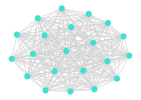

In [12]:
gplot(g)

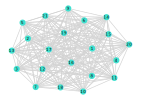

In [14]:
nodelabel = 1:nv(g)
gplot(g, nodelabel=nodelabel)

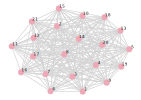

In [15]:
gplot(g, nodelabel=nodelabel, nodelabeldist=1.5, nodelabelangleoffset=π/4,nodefillc="pink2")

In [16]:
g_mst=kruskal_mst(g,minimize=false)

20-element Array{SimpleWeightedEdge{Int64,Float64},1}:
 Edge 1 => 2 with weight 3.90160547696464
 Edge 3 => 4 with weight 3.86067648660432
 Edge 5 => 6 with weight 3.85579315541714
 Edge 6 => 7 with weight 3.84108825206486
 Edge 8 => 9 with weight 3.76468975514626
 Edge 9 => 10 with weight 3.76384962447538
 Edge 4 => 11 with weight 3.74814754741044
 Edge 9 => 12 with weight 3.74090333248784
 Edge 12 => 13 with weight 3.57838682985612
 Edge 5 => 8 with weight 3.40879430952012
 Edge 2 => 14 with weight 3.40489580255538
 Edge 3 => 10 with weight 3.33868416288256
 Edge 4 => 15 with weight 3.32608933095458
 Edge 14 => 16 with weight 3.27882562562348
 Edge 12 => 17 with weight 3.2571516743888
 Edge 1 => 3 with weight 3.2130693301372
 Edge 14 => 18 with weight 3.16512447195928
 Edge 18 => 19 with weight 2.93316914265982
 Edge 12 => 21 with weight 2.76064343688234
 Edge 17 => 20 with weight 2.69518548317692

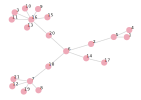

In [17]:
g_mst = SimpleWeightedGraph(size(g)[1]) #Create a new graph
for ew in kruskal_mst(g)
   add_edge!(g_mst,ew.src,ew.dst,ew.weight)
end
gplot(g_mst, nodelabel=nodelabel, nodelabeldist=1.5, nodelabelangleoffset=π/4,nodefillc="pink2")

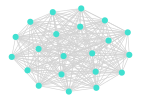

In [47]:
# nodes size proportional to their degree
nodesize = [LightGraphs.outdegree(g, v) for v in LightGraphs.vertices(g)]
gplot(g, nodesize=nodesize)

  Resolving package versions...
Updating `C:\Users\15145\.julia\environments\v1.5\Project.toml`
  [5ae59095] + Colors v0.12.6
No Changes to `C:\Users\15145\.julia\environments\v1.5\Manifest.toml`


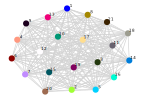

In [23]:
import Pkg
Pkg.add("Colors")

using Colors

# Generate n maximally distinguishable colors in LCHab space.
nodefillc = distinguishable_colors(nv(g), colorant"blue")
gplot(g, nodefillc=nodefillc, nodelabel=nodelabel, nodelabeldist=1.8, nodelabelangleoffset=π/4)

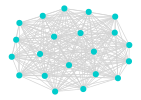

In [24]:
alphas = nodesize/maximum(nodesize)
nodefillc = [RGBA(0.0,0.8,0.8,i) for i in alphas]
gplot(g, nodefillc=nodefillc)

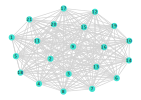

In [25]:
nodelabelsize = nodesize
gplot(g, nodelabelsize=nodelabelsize, nodesize=nodesize, nodelabel=nodelabel)

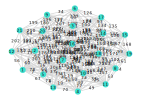

In [26]:
edgelabel = 1:LightGraphs.ne(g)
gplot(g, edgelabel=edgelabel, nodelabel=nodelabel)

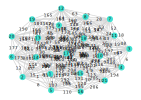

In [27]:
edgelabel = 1:LightGraphs.ne(g)
gplot(g, edgelabel=edgelabel, nodelabel=nodelabel, edgelabeldistx=0.5, edgelabeldisty=0.5)

In [32]:
import Pkg
Pkg.add("Cairo")
import Pkg
Pkg.add("Compose")
using Cairo, Compose
draw(PDF("GBM.pdf", 16cm, 16cm), gplot(g))

  Resolving package versions...
No Changes to `C:\Users\15145\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\15145\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
Updating `C:\Users\15145\.julia\environments\v1.5\Project.toml`
  [a81c6b42] + Compose v0.9.2
No Changes to `C:\Users\15145\.julia\environments\v1.5\Manifest.toml`


In [38]:
nv(g) 


21

In [39]:
ne(g)

210

In [40]:
has_self_loops(g)

false

In [45]:
dfs_tree(g, 1)

{21, 20} directed simple Int64 graph

In [48]:
diffusion(g, 0.9, 10)

10-element Array{Array{Int64,1},1}:
 [1]
 [4, 2, 3, 16, 11, 5, 21, 20, 7, 9, 13, 10, 14, 19, 17, 8, 15, 6, 18]
 [12]
 []
 []
 []
 []
 []
 []
 []

In [49]:
is_connected(g)

true

In [56]:
bridges(g)

LightGraphs.SimpleGraphs.SimpleEdge{Int64}[]

In [63]:
kruskal_mst(g)

20-element Array{SimpleWeightedEdge{Int64,Float64},1}:
 Edge 15 => 16 with weight 0.0104385094480632
 Edge 6 => 14 with weight 0.0819604938314974
 Edge 16 => 20 with weight 0.0919052180952802
 Edge 2 => 6 with weight 0.112261454227799
 Edge 6 => 18 with weight 0.1745800552059118
 Edge 7 => 19 with weight 0.1793460246606144
 Edge 7 => 18 with weight 0.214267540104052
 Edge 6 => 20 with weight 0.268741936727874
 Edge 14 => 17 with weight 0.280086255382158
 Edge 1 => 5 with weight 0.280333486221224
 Edge 13 => 16 with weight 0.290421376645734
 Edge 2 => 5 with weight 0.303657064139408
 Edge 7 => 21 with weight 0.440004408251422
 Edge 7 => 12 with weight 0.523314510162542
 Edge 11 => 16 with weight 0.54468813973318
 Edge 3 => 16 with weight 0.91404563619835
 Edge 10 => 16 with weight 1.079218573553308
 Edge 4 => 5 with weight 1.091783161767466
 Edge 9 => 16 with weight 1.277542869485316
 Edge 7 => 8 with weight 1.666436712226092

In [66]:
kruskal_mst(g, minimize= true)

20-element Array{SimpleWeightedEdge{Int64,Float64},1}:
 Edge 15 => 16 with weight 0.0104385094480632
 Edge 6 => 14 with weight 0.0819604938314974
 Edge 16 => 20 with weight 0.0919052180952802
 Edge 2 => 6 with weight 0.112261454227799
 Edge 6 => 18 with weight 0.1745800552059118
 Edge 7 => 19 with weight 0.1793460246606144
 Edge 7 => 18 with weight 0.214267540104052
 Edge 6 => 20 with weight 0.268741936727874
 Edge 14 => 17 with weight 0.280086255382158
 Edge 1 => 5 with weight 0.280333486221224
 Edge 13 => 16 with weight 0.290421376645734
 Edge 2 => 5 with weight 0.303657064139408
 Edge 7 => 21 with weight 0.440004408251422
 Edge 7 => 12 with weight 0.523314510162542
 Edge 11 => 16 with weight 0.54468813973318
 Edge 3 => 16 with weight 0.91404563619835
 Edge 10 => 16 with weight 1.079218573553308
 Edge 4 => 5 with weight 1.091783161767466
 Edge 9 => 16 with weight 1.277542869485316
 Edge 7 => 8 with weight 1.666436712226092

In [18]:
prim_mst(g)

20-element Array{LightGraphs.SimpleGraphs.SimpleEdge{Int64},1}:
 Edge 5 => 2
 Edge 16 => 3
 Edge 5 => 4
 Edge 1 => 5
 Edge 2 => 6
 Edge 18 => 7
 Edge 7 => 8
 Edge 16 => 9
 Edge 16 => 10
 Edge 16 => 11
 Edge 7 => 12
 Edge 16 => 13
 Edge 6 => 14
 Edge 16 => 15
 Edge 20 => 16
 Edge 14 => 17
 Edge 6 => 18
 Edge 7 => 19
 Edge 6 => 20
 Edge 7 => 21

In [79]:
dijkstra_shortest_paths(g, 1)

LightGraphs.DijkstraState{Float64,Int64}([0, 5, 7, 5, 1, 1, 19, 7, 1, 1  …  7, 16, 6, 5, 15, 1, 6, 1, 6, 5], [0.0, 0.583990550360632, 1.5074266499527704, 1.37211664798869, 0.280333486221224, 0.562370878960302, 0.5768629731356284, 2.24329968536172, 1.51428416533707, 1.80511810035208  …  1.1001774832981703, 1.1835570644024451, 0.6443313727917994, 0.882697178308648, 0.8931356877567113, 0.747634738708264, 0.7369509341662138, 0.397516948475014, 0.831112815688176, 1.009971848648724], [Int64[], Int64[], Int64[], Int64[], Int64[], Int64[], Int64[], Int64[], Int64[], Int64[]  …  Int64[], Int64[], Int64[], Int64[], Int64[], Int64[], Int64[], Int64[], Int64[], Int64[]], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], Int64[])

In [83]:
bellman_ford_shortest_paths(g, 3)

LightGraphs.BellmanFordState{Float64,Int64}([19, 6, 0, 16, 15, 20, 3, 16, 16, 16  …  7, 16, 6, 16, 3, 19, 7, 7, 16, 7], [1.5074266499527704, 1.3869542452493033, 0.0, 2.45950488485445, 1.5268478377338373, 1.2746927910215042, 0.930563676817142, 2.586787496882962, 2.191588505683666, 1.993264209751658  …  1.4538781869796842, 1.204467012844084, 1.3566532848530017, 0.9244841456464132, 0.91404563619835, 1.5654158538553664, 1.144831216921194, 1.1099097014777564, 1.0059508542936302, 1.370568085068564])

In [87]:
center(g)

1-element Array{Int64,1}:
 16

In [88]:
diameter(g)

3.03653502017804

In [91]:
betweenness_centrality(g)

21-element Array{Float64,1}:
 0.010526315789473684
 0.07368421052631578
 0.0
 0.0
 0.08421052631578947
 0.35789473684210527
 0.18947368421052632
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.06315789473684211
 0.03684210526315789
 0.39473684210526316
 0.0
 0.1368421052631579
 0.042105263157894736
 0.21578947368421053
 0.0

In [92]:
closeness_centrality(g, normalize=true)

21-element Array{Float64,1}:
 1.00568006810535
 1.28228332448121
 0.6810465548638197
 0.5399981819200532
 1.1111305974705536
 1.3986335488404606
 1.1622026549549214
 0.46598754346061144
 0.5433036587062456
 0.5644577256301071
 0.8287742851753542
 0.7570580427717716
 0.9669506905748508
 1.3101145574275725
 1.305299890225991
 1.3187765188083798
 1.012381575950885
 1.2553508079147437
 1.2076562708175007
 1.3131780698712494
 0.8168653425104621

In [93]:
degree_centrality(g)

21-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [94]:
indegree_centrality(g)

21-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [96]:
eigenvector_centrality(g)

21-element Array{Float64,1}:
 0.20952492054502686
 0.19280566699438395
 0.2602538323549946
 0.26255840351454435
 0.18342525649480623
 0.1600103914752922
 0.15050518647907987
 0.27964830316574363
 0.2679670167451129
 0.27295078094286584
 0.2496014861912524
 0.2616071859804524
 0.25287534535993383
 0.19844549721840102
 0.2144802502740931
 0.13263948522720445
 0.195197927938822
 0.1827520195240194
 0.17009477111255764
 0.1960959476075155
 0.19823610334943964

In [100]:
pagerank(g)

21-element Array{Float64,1}:
 0.04761904761904763
 0.04761904761904763
 0.04761904761904763
 0.04761904761904763
 0.04761904761904763
 0.04761904761904763
 0.04761904761904763
 0.04761904761904763
 0.04761904761904763
 0.04761904761904763
 0.04761904761904763
 0.04761904761904763
 0.04761904761904763
 0.04761904761904763
 0.04761904761904763
 0.04761904761904763
 0.04761904761904763
 0.04761904761904763
 0.04761904761904763
 0.04761904761904763
 0.04761904761904763

In [103]:
maximal_cliques(g)

1-element Array{Array{Int64,1},1}:
 [1, 2, 16, 11, 21, 7, 9, 10, 19, 17  …  20, 6, 4, 13, 14, 3, 5, 15, 12, 18]

In [104]:
global_clustering_coefficient(g)

1.0

In [112]:
core_periphery_deg(g)

21-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 2

In [19]:
local_clustering_coefficient(g,1)


1.0

In [20]:
local_clustering_coefficient(g,2)


1.0